In [53]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [54]:
class MyState(TypedDict):
    name: str
    compliment: str
    

In [55]:
def complimenterNode(state: MyState)->MyState:
    state["compliment"] = state["name"] + " is hero"
    return state

In [56]:
def haterNode(state: MyState)->MyState:
    state["compliment"] = state["compliment"] + " and chutiya"
    return state

In [57]:
graph = StateGraph(MyState)
# print(graph)

In [58]:
graph.add_node("complimenter" , complimenterNode)


In [59]:
graph.add_node("hater" , haterNode)

In [60]:
graph.add_edge("complimenter" , "hater")

In [61]:
graph.set_entry_point("complimenter")
graph.set_finish_point("hater")


In [62]:
app = graph.compile()

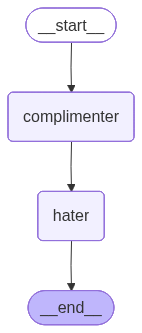

In [63]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [64]:
result = app.invoke({"name":"John"})

In [65]:
print(result)

{'name': 'John', 'compliment': 'John is hero and chutiya'}
